# Hotel bookings

In [155]:
# Libraries and needed imports
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from warnings import filterwarnings
filterwarnings ('ignore')
import folium
import plotly.express as px
from folium.plugins import HeatMap
import sort_dataframeby_monthorweek as sd
from sklearn.linear_model import Lasso # linear algorithm
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [156]:
df = pd.read_csv('hotel_bookings.csv')

In [157]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [158]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [159]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [160]:
df.isna().sum().sum()

129425

In [161]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [162]:
df.shape

(119390, 32)

In [163]:
# Fill missing values with zeros
def data_clean(df):
    df.fillna(0, inplace= True)
    print(df.isnull().sum())

In [164]:
data_clean(df)

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [165]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [166]:
# Print the unique values in 'adults','children','babies'
list =['adults','children','babies']
for i in list:
    print('{} has unique value as {}'.format (i , df[i].unique()))

adults has unique value as [ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]
children has unique value as [ 0.  1.  2. 10.  3.]
babies has unique value as [ 0  1  2 10  9]


In [167]:
# Check children =0 and adults = 0 and babies = 0 filter.
filter = ((df['children']==0) & (df['adults']==0)&(df['babies']==0))

In [168]:
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,0.0,0,SC,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,0.0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,0.0,0,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [169]:
# To display all 32 columns in this DataFrame
pd.set_option('display.max_columns',32) 

In [170]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [171]:
#Create data DataFrame where adult,children & babies are 0
data=df[~filter]

In [172]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [173]:
data.shape

(119210, 32)

In [174]:
data.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


## Country wise analysis

In [175]:
# Countries where reservation not canceled and number of guests
Country_wise_data =df[df['is_canceled']==0]['country'].value_counts().reset_index()
# Change the column names to Country and number of guests
Country_wise_data.columns =['Country','Number of guests']
# Display results 
Country_wise_data

,Country,Number of guests
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
...,...,...
161,PYF,1
162,BDI,1
163,SDN,1
164,KIR,1


In [176]:
basemap = folium.Map()

In [177]:
#Visualize countries and number of guests 
map_guest =px.choropleth(Country_wise_data,locations=Country_wise_data['Country'],color= Country_wise_data['Number of guests'],hover_name=Country_wise_data['Country'], 
                    title="Home country of guests")
map_guest.show()

#### Most guests are from Europe and Portugal

## Average room price per night

In [178]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [179]:
data2= data[data['is_canceled']==0]

In [180]:
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

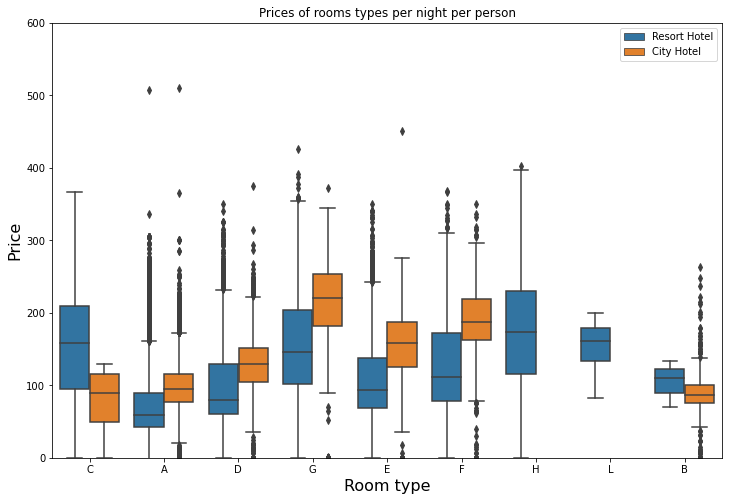

In [181]:
#This Box plot shows the average price per room, depending on its type.
plt.figure(figsize = (12,8))
sns.boxplot(x= 'reserved_room_type',
            y='adr',
            hue='hotel',
            data=data2)
plt.title('Prices of rooms types per night per person')
plt.xlabel('Room type',fontsize=16)
plt.ylabel('Price',fontsize=16)
plt.legend(loc='upper right')
plt.ylim(0,600)
plt.show()


## How does the price per night varry over the year? 

In [182]:
data_resort = df[(df["hotel"] == "Resort Hotel") & (df["is_canceled"] == 0)]
data_city = df[(df["hotel"] == "City Hotel") & (df["is_canceled"] == 0)]

In [183]:
data_resort.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [184]:
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.322236
3,February,54.147478
4,January,48.708919
5,July,150.122528
6,June,107.921869
7,March,57.012487
8,May,76.657558
9,November,48.681640


In [185]:
city_hotel = data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

,arrival_date_month,adr
0,April,111.856824
1,August,118.412083
2,December,87.856764
3,February,86.183025
4,January,82.160634
5,July,115.563810
6,June,117.702075
7,March,90.170722
8,May,120.445842
9,November,86.500456


In [186]:
final =resort_hotel.merge(city_hotel,on='arrival_date_month')
final.columns = ['Month','Price_for_resort','Price_for_city_hotel']
final

,Month,Price_for_resort,Price_for_city_hotel
0,April,75.867816,111.856824
1,August,181.205892,118.412083
2,December,68.322236,87.856764
3,February,54.147478,86.183025
4,January,48.708919,82.160634
5,July,150.122528,115.563810
6,June,107.921869,117.702075
7,March,57.012487,90.170722
8,May,76.657558,120.445842
9,November,48.681640,86.500456


In [187]:
final.columns = ['Month','Price_for_resort','Price_for_city_hotel']
final

,Month,Price_for_resort,Price_for_city_hotel
0,April,75.867816,111.856824
1,August,181.205892,118.412083
2,December,68.322236,87.856764
3,February,54.147478,86.183025
4,January,48.708919,82.160634
5,July,150.122528,115.563810
6,June,107.921869,117.702075
7,March,57.012487,90.170722
8,May,76.657558,120.445842
9,November,48.681640,86.500456


In [188]:
# Order the months

In [189]:
#!pip install sort-dataframeby-monthorweek
#!pip install sorted-months-weekdays

In [190]:
def sort_data(df,col):
    return sd.Sort_Dataframeby_Month(df,col)

In [191]:
final = sort_data(final,'Month')

In [192]:
final

,Month,Price_for_resort,Price_for_city_hotel
0,January,48.708919,82.160634
1,February,54.147478,86.183025
2,March,57.012487,90.170722
3,April,75.867816,111.856824
4,May,76.657558,120.445842
5,June,107.921869,117.702075
6,July,150.122528,115.563810
7,August,181.205892,118.412083
8,September,96.416860,112.598452
9,October,61.727505,101.745956


In [193]:
px.line(final,x= 'Month',y =['Price_for_resort','Price_for_city_hotel'],title='Room price per night per months')

#### Prices of resorts are higher during the summer 
#### Prices of hotels varies 

## The most busy month?

In [194]:
data_resort.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [195]:
rush_resort = data_resort['arrival_date_month'].value_counts().reset_index()
rush_resort.columns = ['Month','Num of guests']

In [196]:
rush_resort

,Month,Num of guests
0,August,3257
1,July,3137
2,October,2577
3,March,2573
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2038
9,December,2017


In [197]:
rush_city = data_city ['arrival_date_month'].value_counts().reset_index()
rush_city.columns = ['Month','Num of guests']

In [198]:
rush_city

,Month,Num of guests
0,August,5381
1,July,4782
2,May,4579
3,June,4366
4,October,4337
5,September,4290
6,March,4072
7,April,4015
8,February,3064
9,November,2696


#### Combine Resort and city

In [199]:
final_rush = rush_resort.merge(rush_city , on='Month')
final_rush.columns =['Month','Num_of_guests_resort','Num_of_guests_city']
final_rush

,Month,Num_of_guests_resort,Num_of_guests_city
0,August,3257,5381
1,July,3137,4782
2,October,2577,4337
3,March,2573,4072
4,April,2550,4015
5,May,2535,4579
6,February,2308,3064
7,September,2102,4290
8,June,2038,4366
9,December,2017,2392


In [200]:
final_rush = sort_data(final_rush,'Month')
final_rush

,Month,Num_of_guests_resort,Num_of_guests_city
0,January,1868,2254
1,February,2308,3064
2,March,2573,4072
3,April,2550,4015
4,May,2535,4579
5,June,2038,4366
6,July,3137,4782
7,August,3257,5381
8,September,2102,4290
9,October,2577,4337


In [201]:
final_rush.dtypes

Month                   object
Num_of_guests_resort     int64
Num_of_guests_city       int64
dtype: object

In [202]:
final_rush.columns

Index(['Month', 'Num_of_guests_resort', 'Num_of_guests_city'], dtype='object')

In [203]:
px.line(final_rush,x='Month',y=['Num_of_guests_resort','Num_of_guests_city'])

#### The city has more guests during spring and fall while prices are higher. 
#### Guests number slightly go down in resorts from june to september.

## How long do people stay at the hotels?

In [204]:
filter = data['is_canceled']==0
clean_data=data[filter]

In [205]:
clean_data.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015


In [206]:
clean_data["total_nights"] =clean_data['stays_in_weekend_nights']+clean_data['stays_in_week_nights']

In [207]:
clean_data.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,...,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,...,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,...,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015,1


In [208]:
stay = clean_data.groupby(['total_nights','hotel']).agg('count').reset_index()
stay= stay.iloc[:,0:3]
stay.head()

,total_nights,hotel,is_canceled
0,0,City Hotel,251
1,0,Resort Hotel,371
2,1,City Hotel,9155
3,1,Resort Hotel,6579
4,2,City Hotel,10983


In [209]:
stay=stay.rename(columns={'is_canceled':'number of stays'})
stay.head()

,total_nights,hotel,number of stays
0,0,City Hotel,251
1,0,Resort Hotel,371
2,1,City Hotel,9155
3,1,Resort Hotel,6579
4,2,City Hotel,10983


<AxesSubplot:xlabel='total_nights', ylabel='number of stays'>

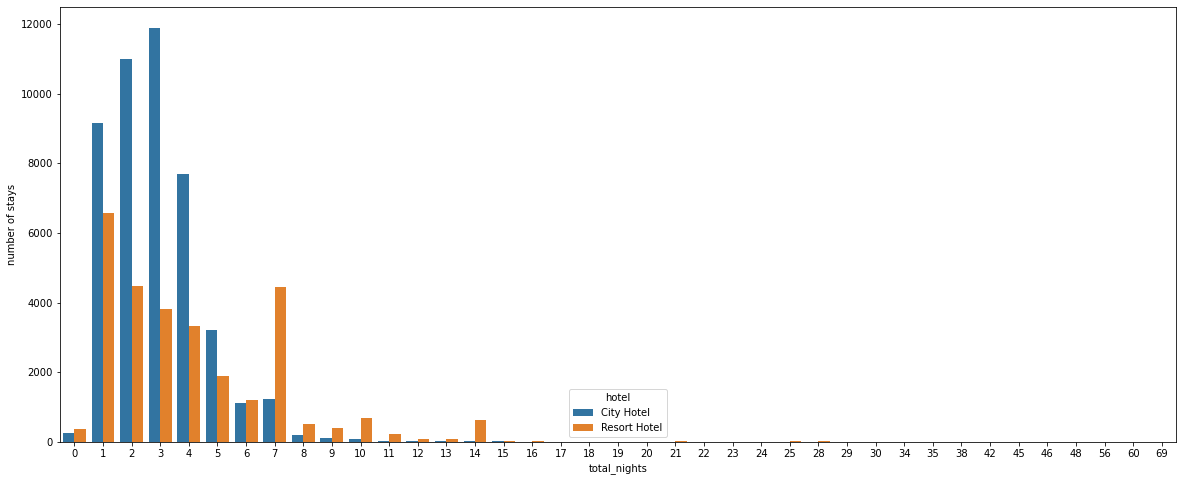

In [210]:
plt.figure(figsize=(20, 8))
sns.barplot(x = "total_nights", y = "number of stays" , hue="hotel",
            hue_order = ["City Hotel", "Resort Hotel"], data=stay)

## Selecting important features

In [211]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [212]:
data.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.292876,0.016622,0.008315,-0.005948,-0.001323,0.025542,0.058182,0.004851,-0.032569,-0.083745,0.110139,-0.057365,-0.144832,-0.046770,-0.083594,0.054301,0.046492,-0.195701,-0.234877
lead_time,0.292876,1.000000,0.040334,0.127046,0.002306,0.085985,0.166892,0.117575,-0.037878,-0.021003,-0.123209,0.086025,-0.073599,0.002230,-0.013114,-0.085854,0.170008,-0.065018,-0.116624,-0.095949
arrival_date_year,0.016622,0.040334,1.000000,-0.540373,-0.000121,0.021694,0.031203,0.030266,0.054710,-0.013192,0.010281,-0.119905,0.029234,0.031416,0.056438,0.033682,-0.056348,0.198429,-0.013812,0.108610
arrival_date_week_number,0.008315,0.127046,-0.540373,1.000000,0.066572,0.018629,0.016047,0.026567,0.005556,0.010417,-0.031125,0.035493,-0.021009,0.006311,-0.018225,-0.032912,0.022677,0.076281,0.001980,0.026202
arrival_date_day_of_month,-0.005948,0.002306,-0.000121,0.066572,1.000000,-0.016225,-0.028362,-0.001754,0.014550,-0.000235,-0.006471,-0.027027,-0.000306,0.011266,0.000159,0.003667,0.022532,0.030291,0.008569,0.003026
stays_in_weekend_nights,-0.001323,0.085985,0.021694,0.018629,-0.016225,1.000000,0.494175,0.094759,0.046135,0.018607,-0.086009,-0.012769,-0.042859,0.050191,0.162411,-0.080783,-0.054399,0.050670,-0.018520,0.073124
stays_in_week_nights,0.025542,0.166892,0.031203,0.016047,-0.028362,0.494175,1.000000,0.096214,0.044652,0.020373,-0.095302,-0.013976,-0.048873,0.080018,0.196777,-0.044437,-0.002026,0.066847,-0.024933,0.068738
adults,0.058182,0.117575,0.030266,0.026567,-0.001754,0.094759,0.096214,1.000000,0.029409,0.017890,-0.140973,-0.007070,-0.108856,-0.041472,0.023370,-0.166182,-0.008365,0.224253,0.014438,0.123353
children,0.004851,-0.037878,0.054710,0.005556,0.014550,0.046135,0.044652,0.029409,1.000000,0.023999,-0.032475,-0.024755,-0.021078,0.051000,0.050461,-0.042554,-0.033293,0.325057,0.056247,0.081747
babies,-0.032569,-0.021003,-0.013192,0.010417,-0.000235,0.018607,0.020373,0.017890,0.023999,1.000000,-0.008813,-0.007509,-0.006552,0.085605,0.030235,-0.009426,-0.010627,0.029043,0.037389,0.097939


In [213]:
co_relation= df.corr()['is_canceled']
co_relation

is_canceled                       1.000000
lead_time                         0.293123
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month        -0.006130
stays_in_weekend_nights          -0.001791
stays_in_week_nights              0.024765
adults                            0.060017
children                          0.005036
babies                           -0.032491
is_repeated_guest                -0.084793
previous_cancellations            0.110133
previous_bookings_not_canceled   -0.057358
booking_changes                  -0.144381
agent                            -0.046529
company                          -0.082995
days_in_waiting_list              0.054186
adr                               0.047557
required_car_parking_spaces      -0.195498
total_of_special_requests        -0.234658
Name: is_canceled, dtype: float64

In [214]:
co_relation.abs().sort_values(ascending=False)

is_canceled                       1.000000
lead_time                         0.293123
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
previous_cancellations            0.110133
is_repeated_guest                 0.084793
company                           0.082995
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
agent                             0.046529
babies                            0.032491
stays_in_week_nights              0.024765
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month         0.006130
children                          0.005036
stays_in_weekend_nights           0.001791
Name: is_canceled, dtype: float64

In [215]:
co_relation.abs().sort_values(ascending=False)[1:]

lead_time                         0.293123
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
previous_cancellations            0.110133
is_repeated_guest                 0.084793
company                           0.082995
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
agent                             0.046529
babies                            0.032491
stays_in_week_nights              0.024765
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month         0.006130
children                          0.005036
stays_in_weekend_nights           0.001791
Name: is_canceled, dtype: float64

#### Most important features are lead_time, total_of_special_requests, required_car_parking_spaces, booking_changes and previous_cancellations.

In [216]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

#### reservation_status feature

In [217]:
data.groupby('is_canceled')['reservation_status'].value_counts()

is_canceled  reservation_status
0            Check-Out             75011
1            Canceled              42993
             No-Show                1206
Name: reservation_status, dtype: int64

In [218]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [219]:
#Exclude features this will not impact canceled reservations
list_not=['days_in_waiting_list','arrival_date_year']

In [220]:
# !='O' means data type is not object 
num_features=[col for col in data.columns if data[col].dtype!='O' and col not in list_not]
num_features
# those are the numeric features

['is_canceled',
 'lead_time',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [221]:
# Exclude some categorical columns 
cat_not =['arrival_date_year','assigned_room_type','booking_changes','reservation_status', 'country','days_in_waiting_list',]
cat_not

['arrival_date_year',
 'assigned_room_type',
 'booking_changes',
 'reservation_status',
 'country',
 'days_in_waiting_list']

In [222]:
cat_features =[col for col in data.columns if data[col].dtype =='O' and col not in cat_not]
cat_features

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

In [223]:
data_cat= data[cat_features]

In [224]:
data_cat.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,7/1/2015
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,7/1/2015
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,7/2/2015
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,7/2/2015
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,7/3/2015


In [225]:
data_cat.dtypes

hotel                      object
arrival_date_month         object
meal                       object
market_segment             object
distribution_channel       object
reserved_room_type         object
deposit_type               object
customer_type              object
reservation_status_date    object
dtype: object

In [226]:
# Reservation status date to date time data type
data_cat['reservation_status_date']=pd.to_datetime(data_cat['reservation_status_date'])

In [227]:
data_cat.dtypes 

hotel                              object
arrival_date_month                 object
meal                               object
market_segment                     object
distribution_channel               object
reserved_room_type                 object
deposit_type                       object
customer_type                      object
reservation_status_date    datetime64[ns]
dtype: object

In [228]:
data_cat['Year'] =data_cat['reservation_status_date'].dt.year
data_cat['Month'] =data_cat['reservation_status_date'].dt.month
data_cat['Day'] =data_cat['reservation_status_date'].dt.day

In [229]:
data_cat.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date,Year,Month,Day
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01,2015,7,1
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01,2015,7,1
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02,2015,7,2
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02,2015,7,2
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03,2015,7,3


In [230]:
# Drop reservation_status_date already splitted it into day month year
data_cat.drop('reservation_status_date',axis=1,inplace=True)

In [231]:
data_cat.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,Year,Month,Day
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015,7,2
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015,7,2
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3


In [232]:
data_cat.dtypes

hotel                   object
arrival_date_month      object
meal                    object
market_segment          object
distribution_channel    object
reserved_room_type      object
deposit_type            object
customer_type           object
Year                     int64
Month                    int64
Day                      int64
dtype: object

In [233]:
data_cat['cancellation']= data['is_canceled']

In [234]:
data_cat.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,Year,Month,Day,cancellation
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1,0
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1,0
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015,7,2,0
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015,7,2,0
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3,0


## Feature encoding

#### Mean encoding technique

In [235]:
cols = data_cat.columns[0:8]
cols

Index(['hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'deposit_type',
       'customer_type'],
      dtype='object')

In [236]:
for col in cols:
    print(data_cat.groupby([col])['cancellation'].mean())

hotel
City Hotel      0.417859
Resort Hotel    0.277674
Name: cancellation, dtype: float64
arrival_date_month
April        0.407835
August       0.377823
December     0.350348
February     0.334451
January      0.305016
July         0.374644
June         0.414860
March        0.322277
May          0.397029
November     0.313100
October      0.380910
September    0.391905
Name: cancellation, dtype: float64
meal
BB           0.374106
FB           0.598997
HB           0.344653
SC           0.374064
Undefined    0.244654
Name: cancellation, dtype: float64
market_segment
Aviation         0.221277
Complementary    0.122253
Corporate        0.187618
Direct           0.153712
Groups           0.611086
Offline TA/TO    0.343313
Online TA        0.367590
Undefined        1.000000
Name: cancellation, dtype: float64
distribution_channel
Corporate    0.220568
Direct       0.174868
GDS          0.191710
TA/TO        0.410598
Undefined    0.800000
Name: cancellation, dtype: float64
reserved_room_typ

In [237]:
for col in cols:
    print(data_cat.groupby([col])['cancellation'].mean().to_dict())
    print('\n')

{'City Hotel': 0.4178593534858457, 'Resort Hotel': 0.27767373336329815}


{'April': 0.40783534934103627, 'August': 0.37782266791717767, 'December': 0.35034768456872317, 'February': 0.3344510680576254, 'January': 0.305016044587063, 'July': 0.37464409996836445, 'June': 0.41485954799158203, 'March': 0.32227682227682225, 'May': 0.3970288624787776, 'November': 0.31309998523113275, 'October': 0.38090966179241054, 'September': 0.3919047619047619}


{'BB': 0.3741055553146277, 'FB': 0.5989974937343359, 'HB': 0.3446534790427445, 'SC': 0.3740638923120675, 'Undefined': 0.2446535500427716}


{'Aviation': 0.22127659574468084, 'Complementary': 0.12225274725274725, 'Corporate': 0.18761832639151838, 'Direct': 0.15371165156572883, 'Groups': 0.6110858471022181, 'Offline TA/TO': 0.3433132081713671, 'Online TA': 0.3675897035881435, 'Undefined': 1.0}


{'Corporate': 0.22056833558863329, 'Direct': 0.1748682499486688, 'GDS': 0.19170984455958548, 'TA/TO': 0.41059846547314577, 'Undefined': 0.8}


{'A': 0.391566

In [238]:
dff = data_cat.copy()

In [239]:
for col in cols:
    dict = data_cat.groupby([col])['cancellation'].mean().to_dict()
    data_cat[col]= data_cat[col].map(dict)

In [240]:
data_cat.head(5)

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,Year,Month,Day,cancellation
0,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1,0
1,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1,0
2,0.277674,0.374644,0.374106,0.153712,0.174868,0.391567,0.28402,0.407864,2015,7,2,0
3,0.277674,0.374644,0.374106,0.187618,0.220568,0.391567,0.28402,0.407864,2015,7,2,0
4,0.277674,0.374644,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,2015,7,3,0


In [241]:
dataframe=pd.concat([data_cat,data[num_features]],axis=1)

In [242]:
dataframe.head(5)

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,Year,Month,Day,cancellation,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,adr,required_car_parking_spaces,total_of_special_requests
0,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1,0,0,342,27,1,0,0,2,0.0,0,0,0,0,3,0.0,0.0,0.0,0,0
1,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1,0,0,737,27,1,0,0,2,0.0,0,0,0,0,4,0.0,0.0,0.0,0,0
2,0.277674,0.374644,0.374106,0.153712,0.174868,0.391567,0.28402,0.407864,2015,7,2,0,0,7,27,1,0,1,1,0.0,0,0,0,0,0,0.0,0.0,75.0,0,0
3,0.277674,0.374644,0.374106,0.187618,0.220568,0.391567,0.28402,0.407864,2015,7,2,0,0,13,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0.0,75.0,0,0
4,0.277674,0.374644,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,2015,7,3,0,0,14,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0.0,98.0,0,1


In [243]:
dataframe.drop(['cancellation'],axis=1,inplace=True)

In [244]:
dataframe.shape

(119210, 29)

## Outliers 

<AxesSubplot:xlabel='lead_time', ylabel='Density'>

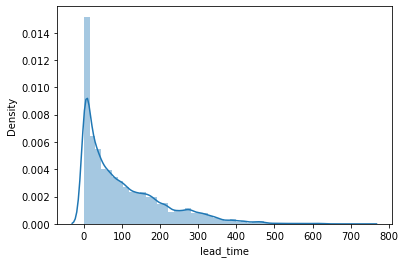

In [245]:
sns.distplot(dataframe['lead_time'])

In [246]:
# handle outlier using log
def handle_outlier(col):
    dataframe[col]=np.log1p(dataframe[col])

In [247]:
handle_outlier('lead_time')

<AxesSubplot:xlabel='lead_time', ylabel='Density'>

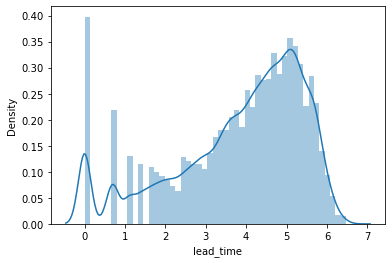

In [248]:
sns.distplot(dataframe['lead_time'])

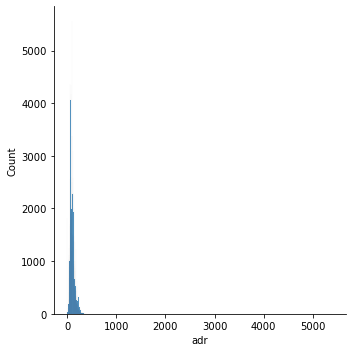

In [249]:
sns.displot(dataframe['adr'])

In [250]:
handle_outlier('adr')

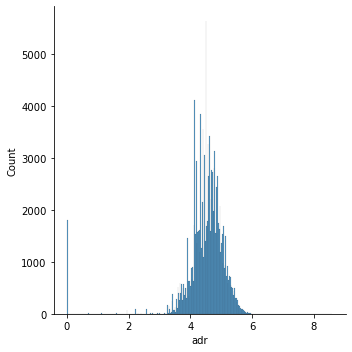

In [251]:
sns.displot(dataframe['adr'].dropna())

In [252]:
dataframe.isnull().sum()

hotel                             0
arrival_date_month                0
meal                              0
market_segment                    0
distribution_channel              0
reserved_room_type                0
deposit_type                      0
customer_type                     0
Year                              0
Month                             0
Day                               0
is_canceled                       0
lead_time                         0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
agent                             0
company                           0
adr                               1
required_car_parking_spaces 

In [253]:
# only one na value decided to drop
dataframe.dropna(inplace=True)

## Feature importance

In [254]:
#Split independent & dependent features
y = dataframe['is_canceled'] # dependent 
x= dataframe.drop('is_canceled', axis=1 ) # independent

In [255]:
# The greater the value of alpha the less features are selected
# Select a suitable alpha
Feature_selection_model = SelectFromModel(Lasso(alpha=0.005,random_state=0))
Feature_selection_model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [256]:
#those are the features that are selected 
Feature_selection_model.get_support()

array([False, False, False, False, False, False,  True, False,  True,
        True,  True,  True,  True, False, False, False,  True,  True,
       False, False,  True, False,  True, False,  True,  True,  True,
        True])

In [257]:
cols=x.columns # All columns

In [258]:
selected = cols[Feature_selection_model.get_support()]

In [259]:
# Number of features selected are 14 out of 28 features 
print('Total features {}'.format(x.shape[1]))
print('My selected features {}'.format(len(selected)))

Total features 28
My selected features 14


In [260]:
selected

Index(['deposit_type', 'Year', 'Month', 'Day', 'lead_time',
       'arrival_date_week_number', 'adults', 'children',
       'previous_cancellations', 'booking_changes', 'company', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

In [261]:
x=x[selected]

In [262]:
# 14 columns the selected features only
x.shape

(119209, 14)

## Train test split

In [263]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=0)

In [264]:
# Logistic regression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

In [265]:
y_pred=logreg.predict(x_test)

In [266]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[19888,  4758],
       [ 6723,  7970]], dtype=int64)

In [267]:
score = accuracy_score(y_test,y_pred)
score

0.7081522153588042

## Cross validate model

In [268]:
from sklearn.model_selection import cross_val_score
score =cross_val_score(logreg,x,y,cv=10)
score

array([0.67083298, 0.71957051, 0.71059475, 0.7219193 , 0.71512457,
       0.73609597, 0.57746833, 0.79515141, 0.72410033, 0.6227349 ])

In [269]:
score.mean()

0.6993593048812963

## Models

In [270]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [271]:
models =[]
models.append(('LogisticRegression',LogisticRegression()))

models.append(('GaussianNB',GaussianNB()))

models.append(('KNeighborsClassifier',KNeighborsClassifier()))

models.append(('RandomForestClassifier',RandomForestClassifier()))
models.append(('DecisionTreeClassifier',DecisionTreeClassifier()))


In [272]:
models

[('LogisticRegression', LogisticRegression()),
 ('GaussianNB', GaussianNB()),
 ('KNeighborsClassifier', KNeighborsClassifier()),
 ('RandomForestClassifier', RandomForestClassifier()),
 ('DecisionTreeClassifier', DecisionTreeClassifier())]

## Fitting models

In [273]:
for name, model in models:
    print(name)
    model.fit(x_train,y_train)
    predictions= model.predict(x_test)
    print(confusion_matrix(predictions,y_test))
    print(accuracy_score(predictions,y_test))
    print('\n')

LogisticRegression
[[19888  6723]
 [ 4758  7970]]
0.7081522153588042


GaussianNB
[[11329  1662]
 [13317 13031]]
0.6192328223899947


KNeighborsClassifier
[[24441  1960]
 [  205 12733]]
0.9449655558097563


RandomForestClassifier
[[24446  1758]
 [  200 12935]]
0.9502275095960752


DecisionTreeClassifier
[[23496  1119]
 [ 1150 13574]]
0.9423218688832965


